<a href="https://colab.research.google.com/github/schauppi/Udemy_TensorFlow_Developer/blob/main/Abschnitt_5_Convolutional_Neural_Networks/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer Vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we´re working with are from the Food101 dataset - https://www.kaggle.com/kmader/food41

However we´ve modified it to only use two   classes (pizza & steak) using the image data modification notebook.


In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-07-14 12:34:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.128, 142.251.2.128, 142.250.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   125MB/s    in 0.8s    

2021-07-14 12:34:02 (125 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for computer vision project.. this usually means visualizing many samples of your data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

#Walk through the pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"Ther are {len (dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

Ther are 2 directories and 1 images in 'pizza_steak'.
Ther are 2 directories and 1 images in 'pizza_steak/test'.
Ther are 0 directories and 250 images in 'pizza_steak/test/pizza'.
Ther are 0 directories and 250 images in 'pizza_steak/test/steak'.
Ther are 2 directories and 1 images in 'pizza_steak/train'.
Ther are 0 directories and 750 images in 'pizza_steak/train/pizza'.
Ther are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [6]:
#The extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Jul 14 12:34 .
drwxr-xr-x 1 root root 4096 Jul 14 12:34 ..
-rw-r--r-- 1 root root 6148 Jul 14 12:34 .DS_Store
drwxr-xr-x 4 root root 4096 Jul 14 12:34 test
drwxr-xr-x 4 root root 4096 Jul 14 12:34 train


In [7]:
#Another way to get out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

Tp visualize our imahes, first let´s get the class names programmatically.

In [8]:
#Get the classnames programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[1:]
print(class_names)

['pizza' 'steak']


In [9]:
#Let´s visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #Setup target directory
  target_folder = target_dir+target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  #show the shape of the image
  print(f"image shape: {img.shape}")

  return img

image shape: (512, 512, 3)


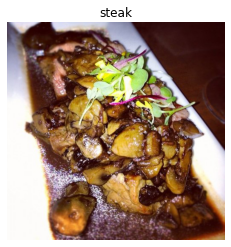

In [10]:
#View a random image from the training dataset
img = view_random_image("pizza_steak/train/", "steak")

image shape: (512, 512, 3)


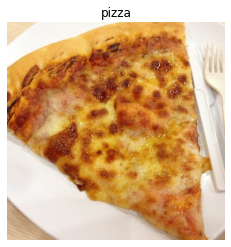

In [11]:
img = view_random_image("pizza_steak/train/", "pizza")

In [12]:
import tensorflow as tf
#tf.constant(img)

In [13]:
#View the image shape
img.shape #return width, height, colour channels

(512, 512, 3)

In [14]:
#Get all the pixel values between 0 & 1
img / 225.

array([[[1.07555556, 0.97777778, 0.80444444],
        [1.07111111, 0.97333333, 0.8       ],
        [1.06666667, 0.96888889, 0.79555556],
        ...,
        [1.11555556, 1.00444444, 0.82222222],
        [1.13333333, 1.02222222, 0.82222222],
        [1.13333333, 1.03111111, 0.82222222]],

       [[1.08      , 0.98222222, 0.80888889],
        [1.08      , 0.98222222, 0.80888889],
        [1.07555556, 0.97777778, 0.80444444],
        ...,
        [1.12888889, 1.01777778, 0.84      ],
        [1.12      , 1.01333333, 0.81777778],
        [1.11111111, 0.99111111, 0.79111111]],

       [[1.08444444, 0.98666667, 0.81333333],
        [1.08444444, 0.98666667, 0.81333333],
        [1.08444444, 0.98666667, 0.81333333],
        ...,
        [1.13333333, 1.03111111, 0.87111111],
        [1.12      , 1.01777778, 0.83555556],
        [1.09333333, 0.99111111, 0.80444444]],

       ...,

       [[1.01777778, 0.90222222, 0.73777778],
        [1.02666667, 0.91111111, 0.74666667],
        [1.04      , 0

## An end-to-end example 

Let´s build a convolutional neural network to find patterns in our images, more specifically we nd a way to:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit training data to our CNN

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Set random seed
tf.random.set_seed(42)

#Preprocess Data (get all of the pixel values between 0 & 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Set up path to out directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, batch_size=32, target_size=(224,224), class_mode="binary", seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir, batch_size=32, target_size=(224,224), class_mode="binary", seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [16]:
#Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(filters=10,
                                                      kernel_size=3,
                                                      activation="relu",
                                                      input_shape=(224,224,3)),
                               tf.keras.layers.Conv2D(10, 3, activation="relu"),
                               tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
                               tf.keras.layers.Conv2D(10, 3, activation="relu"),
                               tf.keras.layers.Conv2D(10, 3, activation="relu"),
                               tf.keras.layers.MaxPool2D(2),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1, activation="sigmoid") 
])
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [17]:
#Compile the model
model_1.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [18]:
#Fit the model
history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 41s 198ms/step - loss: 0.5719 - accuracy: 0.7013 - val_loss: 0.4282 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4459 - accuracy: 0.7920 - val_loss: 0.3471 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 9s 187ms/step - loss: 0.3807 - accuracy: 0.8320 - val_loss: 0.3114 - val_accuracy: 0.8860
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3405 - accuracy: 0.8580 - val_loss: 0.2835 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.2956 - accuracy: 0.8773 - val_loss: 0.3137 - val_accuracy: 0.8620


In [19]:
!nvidia-smi

Wed Jul 14 12:35:29 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    32W /  70W |   2270MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [20]:
#Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

#Using the same model as before

Let´s replicate the model we´ve build in a previous section to see if it works with our image data

In [21]:
#Set random seed
tf.random.set_seed(42)

#Build our model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
])
#Compile the model
model_2.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

#Fit the model
history_2 = model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 174ms/step - loss: 1.0400 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 171ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 171ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 170ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [22]:
# Get a summary of model 2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [23]:
#Set the random seed
tf.random.set_seed(42)

#Create the model
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile the model
model_3.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

#Fit the model
history_3 = model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 179ms/step - loss: 3.6793 - accuracy: 0.6053 - val_loss: 2.1997 - val_accuracy: 0.5680
Epoch 2/5
47/47 [==============================] - 8s 172ms/step - loss: 0.8380 - accuracy: 0.6913 - val_loss: 1.3121 - val_accuracy: 0.5860
Epoch 3/5
47/47 [==============================] - 8s 172ms/step - loss: 0.8847 - accuracy: 0.7167 - val_loss: 0.6157 - val_accuracy: 0.6860
Epoch 4/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6429 - accuracy: 0.7473 - val_loss: 0.6548 - val_accuracy: 0.6960
Epoch 5/5
47/47 [==============================] - 8s 173ms/step - loss: 0.4576 - accuracy: 0.7927 - val_loss: 0.8240 - val_accuracy: 0.7040


In [24]:
#Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification: Let´s break it down

1. Become one with the data
2. Proprocess the data (scaling, normalizing)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model 
7. Repeat until satisfied

image shape: (512, 382, 3)
image shape: (512, 512, 3)


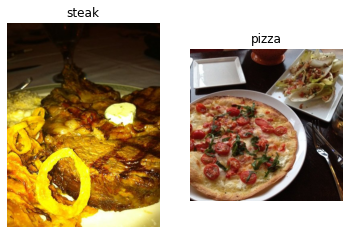

In [25]:
#Visualize data
plt.figure
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [26]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into batches.

A batch is a small subset of data. Rather than look at all 10.000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10.000 images might not fit into the memory of your Processor (GPU)
2. Trying to learn the pattern in 10.000 images in one hit could result in the model not beaing able to leran very well.

Why 32?

Because 32 is good for your health

In [27]:
#Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [28]:
#Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, target_size=(224,224), class_mode="binary", batch_size=32, seed=42)
test_data = test_datagen.flow_from_directory(directory=test_dir, target_size=(224,224), class_mode="binary", batch_size=32, seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [29]:
#Get a sample of a train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [30]:
#How many batches are there
len(train_data)

47

In [31]:
#Get the first two images
images[:2], print(images[0].shape)

(224, 224, 3)


(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.31764707, 0.3254902 , 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34901962, 0.37254903],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.37647063],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.37254903, 0.39607847, 0.29411766],
          [0.39607847, 0.41960788, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.3019608 ],
          [0.30980393, 0.29803923, 0.27058825],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [32]:
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

In [33]:
labels.shape

(32,)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment, you try to beat the baseline.

In deep learning, there is almost an infinite amoount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field of your problem)

In [34]:
#Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [37]:
#Create the model (this will be our baseline, a layer convolutional network)
model_4 = Sequential([
                      Conv2D(filters=10, kernel_size=3, strides=1, padding="valid", activation="relu", input_shape=(224,224,3)),
                      Conv2D(10, 3, activation="relu"),
                      Conv2D(10, 3, activation="relu"),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])

In [38]:
#Compile the model 
model_4.compile(loss="binary_crossentropy", metrics="accuracy", optimizer="Adam")

In [40]:
#Fit the model 
history_4 = model_4.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 191ms/step - loss: 0.0177 - accuracy: 0.9960 - val_loss: 0.7157 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 9s 186ms/step - loss: 0.0133 - accuracy: 0.9980 - val_loss: 0.6865 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.7446 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 9s 186ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.7638 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 8.6540e-04 - accuracy: 1.0000 - val_loss: 0.7635 - val_accuracy: 0.8120


### 5. Evaluating our model

It looks like our model is learning something, lert´s evaluate it.

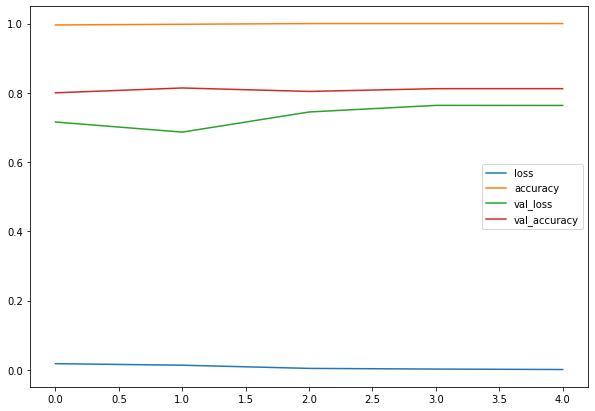

In [43]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [53]:
#Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Return separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

When the validation loss is increasing, it is likely that your model is overfitting.

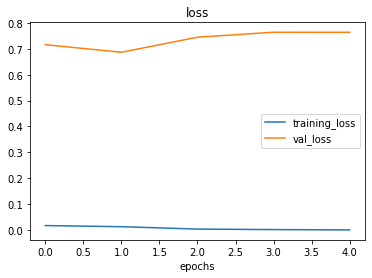

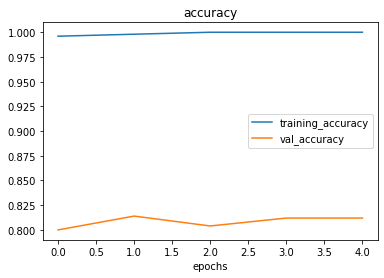

In [55]:
#Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

In [56]:
#Create the model (this is going to be our new baseline)
model_5 = Sequential([
                      Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10, 3, activation="relu"), 
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])

In [57]:
#Compile our model
model_5.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="Adam")

In [60]:
#Fit the model
history_5 = model_5.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 184ms/step - loss: 0.5631 - accuracy: 0.6887 - val_loss: 0.3853 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 8s 180ms/step - loss: 0.4182 - accuracy: 0.8013 - val_loss: 0.3467 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 8s 181ms/step - loss: 0.4014 - accuracy: 0.8253 - val_loss: 0.3296 - val_accuracy: 0.8840
Epoch 4/5
47/47 [==============================] - 8s 180ms/step - loss: 0.3830 - accuracy: 0.8313 - val_loss: 0.3197 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 10s 207ms/step - loss: 0.3571 - accuracy: 0.8613 - val_loss: 0.2860 - val_accuracy: 0.8840


In [61]:
#Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 6760)             

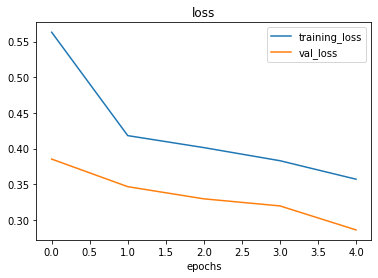

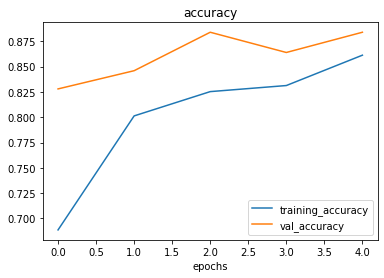

In [62]:
#Plot loss curves
plot_loss_curves(history_5)

### Data augmentation

In [64]:
#Create ImageDataGenerator
train_datagen_augmented = ImageDataGenerator(rescale=1/255., 
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

#Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

#Create ImaageDataGenerator without augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

Let´s write some code to visualize data augmentation...

In [66]:
#Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, target_size=(224,224), batch_size=32, class_mode="binary", shuffle=False)

#Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir, target_size=(224,224), batch_size=32, class_mode="binary", shuffle=False)

#Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224,224), batch_size=32, class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


### Let´s visualize some augmented data

In [69]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number: 6


(-0.5, 223.5, 223.5, -0.5)

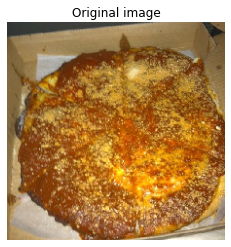

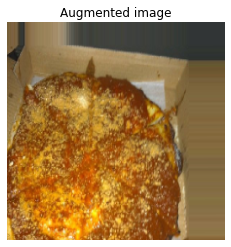

In [80]:
#Show original image and augmented image
random_number = random.randint(0, 31) #batch size are 32
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

Now we´ve seen what augmented training data looks like, let´s build a model and see how it learns.

In [81]:
#Create the model
model_6 = Sequential([
                      Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
                      MaxPool2D(2),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(2),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])

In [82]:
#Compile the model
model_6.compile(loss="binary_crossentropy", metrics="accuracy", optimizer="Adam")

The training last´s longer per epoch, because the images are augmented on the fly (when loaded)

In [83]:
#Fit the model
history_6 = model_6.fit(train_data_augmented, epochs=5, steps_per_epoch=len(train_data_augmented), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 463ms/step - loss: 0.6995 - accuracy: 0.4620 - val_loss: 0.6914 - val_accuracy: 0.5780
Epoch 2/5
47/47 [==============================] - 21s 455ms/step - loss: 0.6936 - accuracy: 0.5060 - val_loss: 0.6897 - val_accuracy: 0.6600
Epoch 3/5
47/47 [==============================] - 21s 450ms/step - loss: 0.7096 - accuracy: 0.5380 - val_loss: 0.6926 - val_accuracy: 0.5420
Epoch 4/5
47/47 [==============================] - 22s 463ms/step - loss: 0.6930 - accuracy: 0.5053 - val_loss: 0.6918 - val_accuracy: 0.5620
Epoch 5/5
47/47 [==============================] - 22s 469ms/step - loss: 0.6947 - accuracy: 0.5013 - val_loss: 0.6901 - val_accuracy: 0.6200


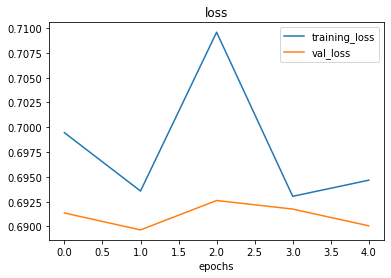

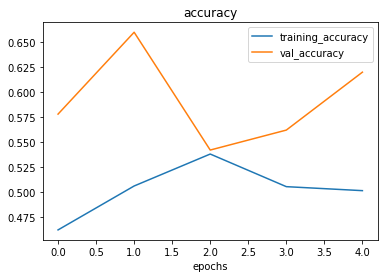

In [84]:
#Check our model training curves
plot_loss_curves(history_6)